# TESTER EXAMPLE
The Tester class provides some methods to evaluate a model by comparing its output to the ground truth under different configurations of patchStep, multiClass, ... It allows testing a single informative image of a full transect involving port and starboard images.
It also makes it possible to segment an acoustic image to visualize the results.

### Import the Tester, the Modelwrapper, the DataGenerator and some auxiliary libraries

In [1]:
from modelwrapper import ModelWrapper
from datagenerator import DataGenerator
from tester import Tester
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Define the transects to evaluate and the corresponding DataGenerator
The DataGenerator is used only to compare with theModel evaluate method. Tester directly works with the transectList.

In [2]:
testTransectList=[8,9]
testGenerator=DataGenerator('DATASET/DATA','DATASET/GT',transectList=testTransectList,doRandomize=False)

### Load a pre-trained model
This model has been trained with all the data except transects 8 and 9 (the test transects) using a patch separation of 1.

In [3]:
theModel=ModelWrapper()
theModel.load('MODELS/MODEL01234567TS01')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


### Evaluate the model using the ModelWrapper method

In [4]:
theNames=theModel.theModel.metrics_names
theMetrics=theModel.evaluate(testGenerator)
for i in range(len(theNames)):
    print('* %s : %.2f' % (theNames[i],theMetrics[i]))

* loss : 0.28
* acc : 0.90


### Create a Tester object
The model to test is the first parameter. Then, both patch step (Delta t in the paper) and multi or single class are configured. Both parameters can be changed later.

In [5]:
theTester=Tester(theModel,patchStep=41,multiClass=False)

### Evaluate the model using Tester
Tester provides two evaluation methods. One is evaluate, which evaluates the model using a single informative image as test data. The other one, used here, is evaluate_multiple, which evaluates a list of informative images.
It provides the confusion matrix, the accuracy and the segmentation time. Other metric, such as precision, recall, F1-Score, ... and their per-class variants are not provided, though can be easily computed from the confusion matrix.

In [6]:
confusionMatrix,theAccuracy,tPredict=theTester.evaluate_multiple(testTransectList)

### Print the results
The time is really small and the accuracy is similar to the one obtained by ModelWrapper

In [7]:
print('* CONFUSION MATRIX :')
print(confusionMatrix)
print('* TIME : %.2f' % tPredict)
print('* ACCURACY : %.2f' % theAccuracy)

* CONFUSION MATRIX :
[[119551.  11901.    852.]
 [ 12486. 231107.    785.]
 [  2826.  12094.  23730.]]
* TIME : 0.44
* ACCURACY : 0.90


### Segment a full transect
A full transect is composed of an even numbered informative image and the subsequent odd numbered image. Thery are assumed to be port and starboard informative images of a single transect.
The output is the segmentation results, the ground truth and the SSS data formatted wo that they can be plotted simulating an actual transect with a blind zone in the middle.

In [8]:
fullSegmented,fullGT,fullTransect=theTester.segment_full_transect(8)

### Plot the segmented transect
First image is the SSS data. Second image is the ground truth. Third image is the segmented data.

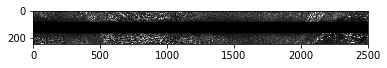

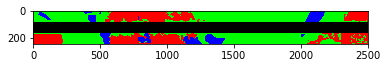

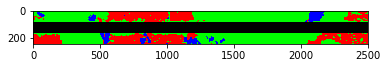

In [9]:
plt.imshow(fullTransect,cmap='gray',vmin=0,vmax=1)
plt.show()
plt.imshow(fullGT)
plt.show()
plt.imshow(fullSegmented)
plt.show()

### Change to Multi-Class

In [10]:
theTester.set_multi_class(True)

### Segment and plot using the Multi-Class configuration
The class contours in the segmented image are now blurry due to the multi-class option.

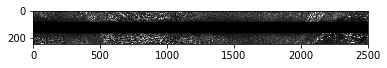

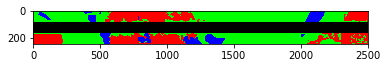

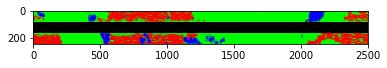

In [11]:
fullSegmented,fullGT,fullTransect=theTester.segment_full_transect(8)
plt.imshow(fullTransect,cmap='gray',vmin=0,vmax=1)
plt.show()
plt.imshow(fullGT)
plt.show()
plt.imshow(fullSegmented)
plt.show()

### Change the patch step
Changes the patch step to, in this case, one. That is, Delta t = 1.

In [12]:
theTester.set_patch_step(1)

### Evaluate with this new patch step
Observe the segmentation time, which is much larger than before.

In [13]:
confusionMatrix,theAccuracy,tPredict=theTester.evaluate_multiple(testTransectList)
print('* CONFUSION MATRIX :')
print(confusionMatrix)
print('* TIME : %.2f' % tPredict)
print('* ACCURACY : %.2f' % theAccuracy)

* CONFUSION MATRIX :
[[120659.  14863.   1105.]
 [ 10458. 233279.   1132.]
 [  1788.   9850.  27012.]]
* TIME : 13.67
* ACCURACY : 0.91


### Plot the results
For the sake of completeness, let us plot the segmented acoustic image using Delta t = 1

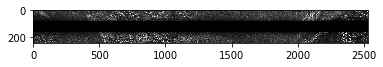

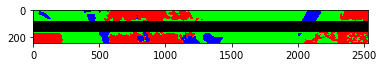

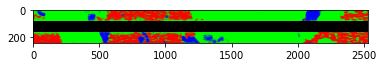

In [14]:
fullSegmented,fullGT,fullTransect=theTester.segment_full_transect(8)
plt.imshow(fullTransect,cmap='gray',vmin=0,vmax=1)
plt.show()
plt.imshow(fullGT)
plt.show()
plt.imshow(fullSegmented)
plt.show()